In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## step1 data 

In [111]:
from data.pricevolume import PriceVolume
pv = PriceVolume(path='/1day/')
pv.build()

In [273]:
print(pv.dates[0], pv.dates[-1])

2019-04-26 08:00:00 2019-09-23 08:00:00


## step 2 resample

In [121]:
from data.resample import Resample
rs = Resample(IS_start=None, IS_end=None, OOS_start=None, OOS_end=None, IS_OOS_ratio=0.7)
IS_Data, OOS_Data = rs.build(pv)

## step 3 alpha

In [123]:
from alpha.alpha_101 import Alpha_101
alpha = Alpha_101()
alpha = alpha.build(IS_Data)

## step 4 Process 

In [265]:
from process.process import Process
p=Process(IS_Data, alpha, 10, 1)
p.build()

## step 5 performace

In [271]:
from performance.original_perform import OriginalPerform
op = OriginalPerform(p, cost=0.001)
op.build()

                                           Alpha Max Drawdown  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00               0.211   

                                           Alpha Max DrawdownPeriod  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                       343   

                                           Alpha PNL  Alpha Rsquared  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00      -0.06           0.121   

                                           Alpha Sharpe  Alpha Turnover  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00        -0.243           0.402   

                                           Net Alpha Max Drawdown  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                   0.267   

                                           Net Alpha Max DrawdownPeriod  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                           343   

                                           Net Alpha PNL  Net Alpha Sharpe  
2019-04-28 20:00:00 - 2019-08-09 08:00:00         -0.224       

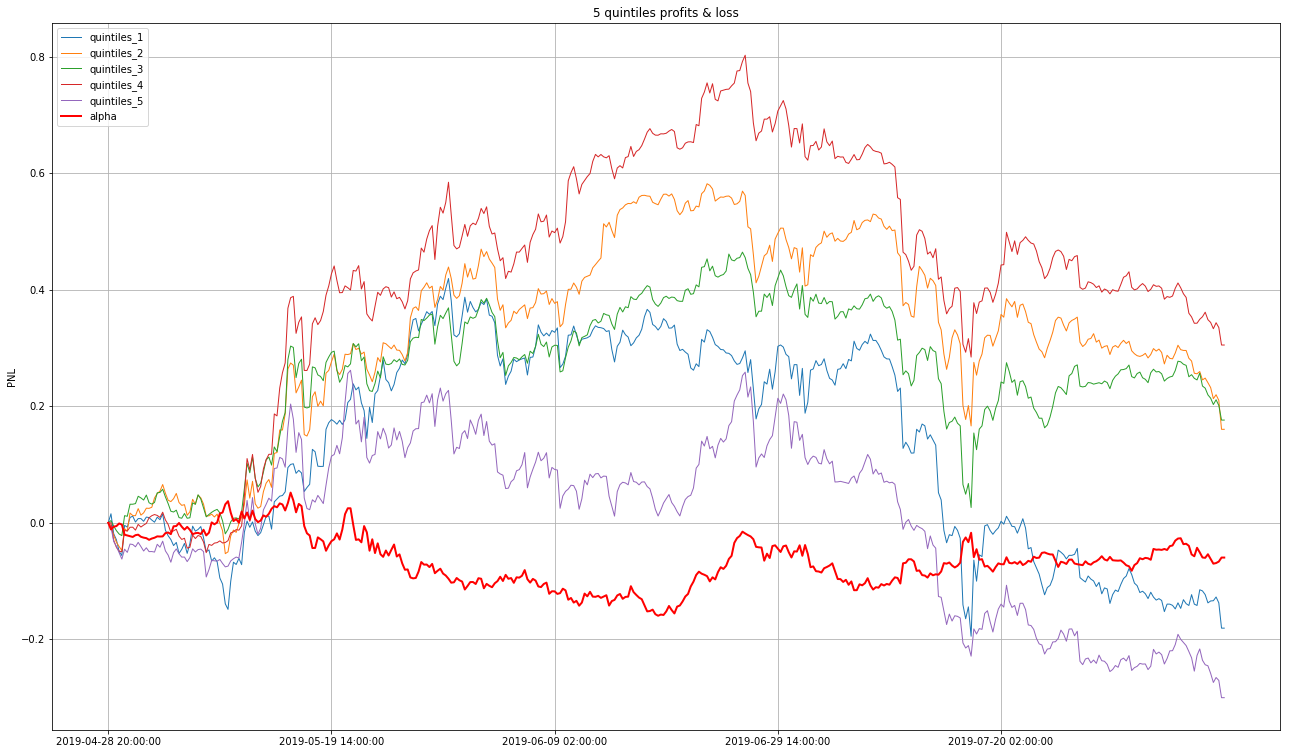

In [268]:
from performance.alpha_perform import AlphaPerform
ap = AlphaPerform(p, cost=0.001, cycle='DAY', quintiles_num=5)
ap.build()
%matplotlib inline

/Users/Hans/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


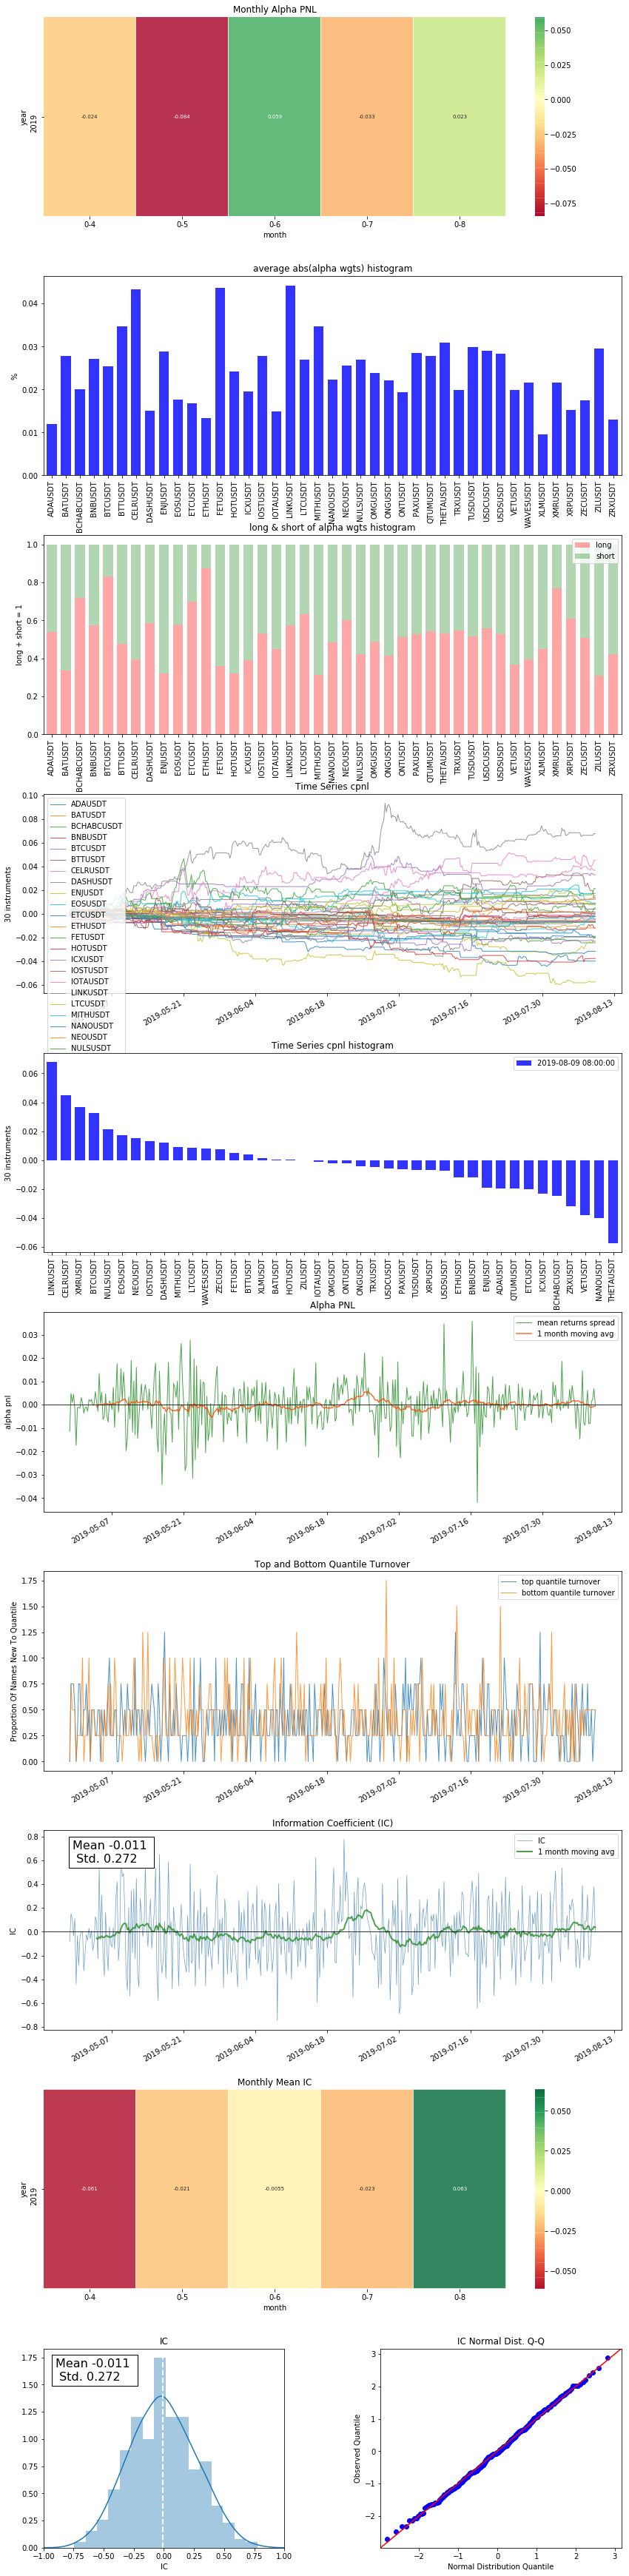

In [272]:
from performance.analysis_plot import AnalysisPlot
AnalysisPlot(pv, p, op, ap).build()